In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import networkx as nx
import seaborn as sns
import string

CLEAN_DATA = True
path = '..//data//IMR90_100kb_chr20.csv'
data = np.array(pd.read_csv(path, header=None))

In [5]:
data = np.array(pd.read_csv(path, header=None))
if CLEAN_DATA:
    non_zero_ind = (pd.DataFrame(data).astype(bool).sum(axis=0) >= 1)
    data = np.array(pd.DataFrame(data)[non_zero_ind[non_zero_ind == True].index].iloc[non_zero_ind[non_zero_ind == True].index])

row_sums = data.sum(axis=1, keepdims=True)
row_norm_matrix = data / row_sums
row_norm_matrix[np.isnan(row_norm_matrix)] = 0

log_data = np.log(data)
log_data[log_data == -np.inf] = 0.0

C:\Users\user\AppData\Local\Temp\ipykernel_13956\3258487044.py:10: RuntimeWarning: divide by zero encountered in log
  log_data = np.log(data)


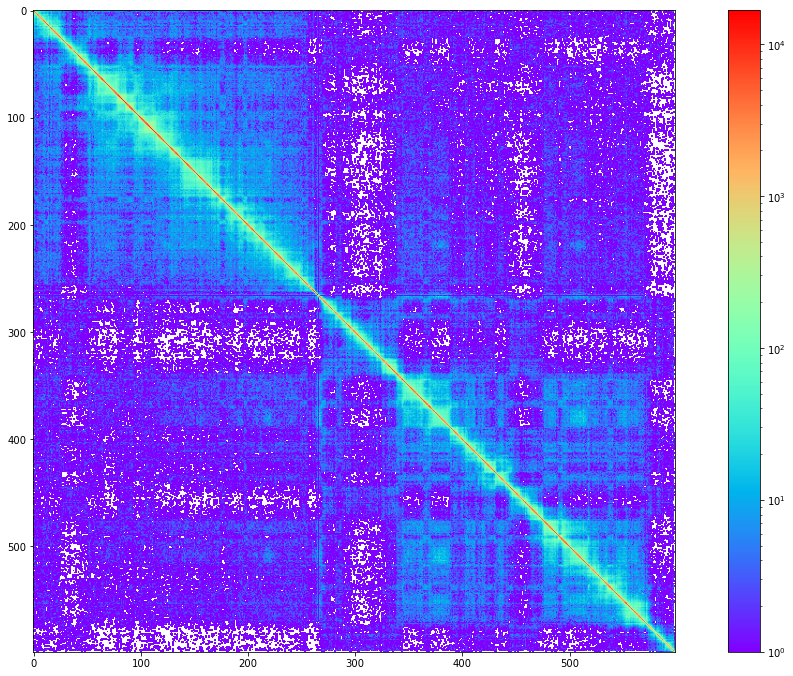

In [7]:
import numpy as np
from matplotlib import pyplot as plt, cm
from matplotlib import colors
plt.rcParams["figure.figsize"] = [15.00, 9.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imshow(data, cmap=cm.rainbow, norm=colors.LogNorm())
plt.colorbar(im)
plt.show()

In [10]:
import fastcluster
from scipy.spatial import distance
from scipy.cluster import hierarchy

In [11]:
x_norm_linkage = fastcluster.complete(log_data)#linkage_vector(log_data)

x_norm_dendrogram = hierarchy.dendrogram(x_norm_linkage, no_plot=True,
                                            color_threshold=-np.inf)

In [12]:
from scipy.cluster.hierarchy import linkage
import numpy as np

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
centers = np.concatenate((a, b),)

def create_tree(centers):
    clusters = {}
    to_merge = linkage(centers, method='single')
    for i, merge in enumerate(to_merge):
        if merge[0] <= len(to_merge):
            # if it is an original point read it from the centers array
            a = centers[int(merge[0]) - 1]
        else:
            # other wise read the cluster that has been created
            a = clusters[int(merge[0])]

        if merge[1] <= len(to_merge):
            b = centers[int(merge[1]) - 1]
        else:
            b = clusters[int(merge[1])]
        # the clusters are 1-indexed by scipy
        clusters[1 + i + len(to_merge)] = {
            'children' : [a, b]
        }
        # ^ you could optionally store other info here (e.g distances)
    return clusters

dengodram =  create_tree(centers)

In [14]:
def create_tree(linked):
    ## inner func to recurvise-ly walk the linkage matrix
    def recurTree(tree):
        k = tree['name']
        ## no children for this node
        if k not in inter:
            return
        for n in inter[k]:
            ## build child nodes
            node = {
                "name": n,
                "parent": k,
                "children": []
            }
            ## add to children
            tree['children'].append(node)
            ## next recursion
            recurTree(node)      
    
    num_rows, _ = linked.shape
    inter = {}
    i = 0
    # loop linked matrix convert to dictionary
    for row in linked:
        i += 1
        inter[float(i + num_rows)] = [row[0],row[1]]

    # start tree data structure
    tree = {
        "name": float(i + num_rows),
        "parent": None,
        "children": []
    }
    # start recursion
    recurTree(tree);
    return tree

#print(create_tree(x_norm_linkage))

In [15]:
import json

In [16]:
dendogram = create_tree(x_norm_linkage)

In [ ]:
import scipy
P = dend
pos = None
plt.clf()
icoord = scipy.array(P['icoord'])
dcoord = scipy.array(P['dcoord'])
color_list = scipy.array(P['color_list'])
xmin, xmax = icoord.min(), icoord.max()
ymin, ymax = dcoord.min(), dcoord.max()
if pos:
    icoord = icoord[pos]
    dcoord = dcoord[pos]
    color_list = color_list[pos]
for xs, ys, color in zip(icoord, dcoord, color_list):
    plt.plot(xs, ys, color)
    break
plt.xlim(xmin-10, xmax + 0.1*abs(xmax))
plt.ylim(ymin, ymax + 0.1*abs(ymax))
plt.show()


In [18]:
x_norm_linkage = fastcluster.complete(log_data)#linkage_vector(log_data)

x_norm_dendrogram = hierarchy.dendrogram(x_norm_linkage, no_plot=True,
                                            color_threshold=-np.inf)

In [ ]:
x_n

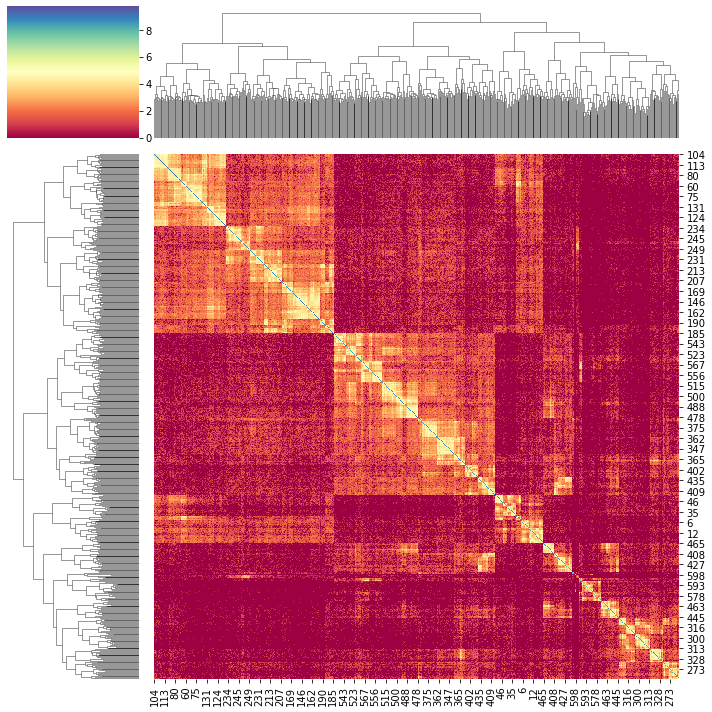

In [17]:
sns.clustermap(log_data, cmap='Spectral', method='complete')